In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [63]:
import pandas as pd
trips=pd.read_csv('metro.csv', parse_dates=['StartTime', 'EndTime'], infer_datetime_format=True)

C:\Users\yedij\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
trips.columns

Index(['TripID', 'Duration', 'StartTime', 'EndTime', 'StartingStationID',
       'StartingStationLatitude', 'StartingStationLongitude',
       'EndingStationID', 'EndingStationLatitude', 'EndingStationLongitude',
       'BikeID', 'PlanDuration', 'TripRouteCategory', 'PassholderType',
       'StartingLat-Long', 'EndingLat-Long'],
      dtype='object')

# Exploring Trips over Time

In [18]:
# Find the start date
ind = pd.DatetimeIndex(trips.StartTime)
trips['date'] = ind.date.astype('datetime64')
trips['hour'] = ind.hour

In [20]:
# Count trips by date
by_date = trips.pivot_table('TripID', aggfunc='count',index='date',columns='PassholderType', )

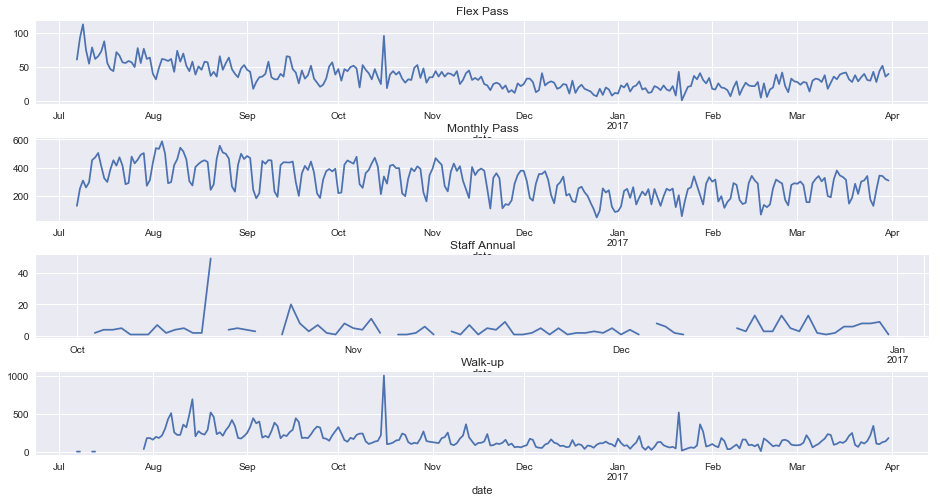

In [22]:
fig, ax = plt.subplots(4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:, 0].plot(ax=ax[0], title='Flex Pass');
by_date.iloc[:, 1].plot(ax=ax[1], title='Monthly Pass');
by_date.iloc[:, 2].plot(ax=ax[2], title='Staff Annual');
by_date.iloc[:, 3].plot(ax=ax[3], title='Walk-up');

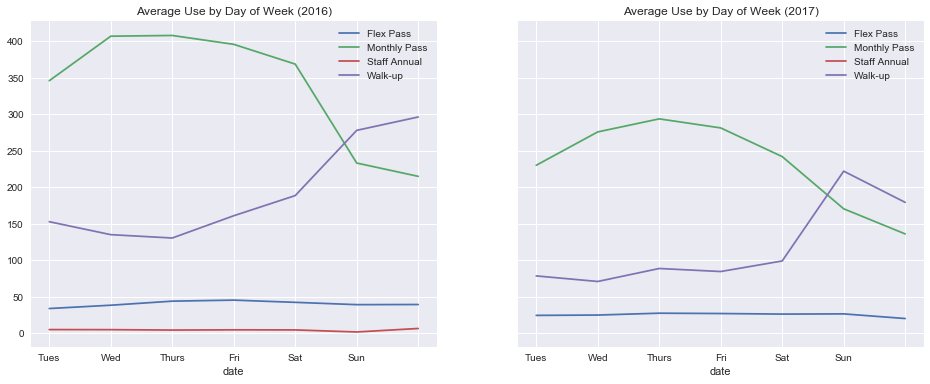

In [23]:
by_weekday = by_date.groupby([by_date.index.year,by_date.index.dayofweek]).mean()
by_weekday.columns.name = None  # remove label for plot

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_weekday.loc[2016].plot(title='Average Use by Day of Week (2016)', ax=ax[0]);
by_weekday.loc[2017].plot(title='Average Use by Day of Week (2017)', ax=ax[1]);
for axi in ax:
    axi.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

In [26]:
# count trips by date and by hour
by_hour = trips.pivot_table('TripID', aggfunc='count',index=['date', 'hour'], columns='PassholderType').fillna(0).reset_index('hour')

# average these counts by weekend
by_hour['weekend'] = (by_hour.index.dayofweek >= 5)
by_hour = by_hour.groupby(['weekend', 'hour']).mean()
by_hour.index.set_levels([['weekday', 'weekend'],["{0}:00".format(i) for i in range(24)]],inplace=True);
by_hour.columns.name = None

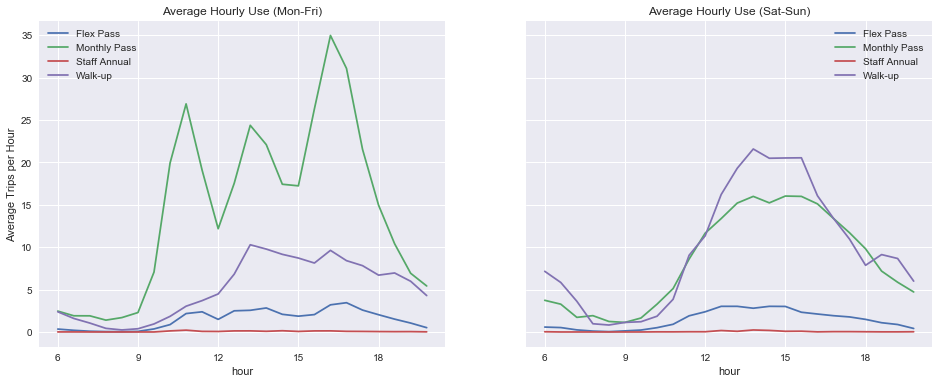

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_hour.loc['weekday'].plot(title='Average Hourly Use (Mon-Fri)', ax=ax[0])
by_hour.loc['weekend'].plot(title='Average Hourly Use (Sat-Sun)', ax=ax[1])
ax[0].set_ylabel('Average Trips per Hour');
for axi in ax:
    axi.set_xticklabels(['3','6', '9', '12', '15', '18', '21'])

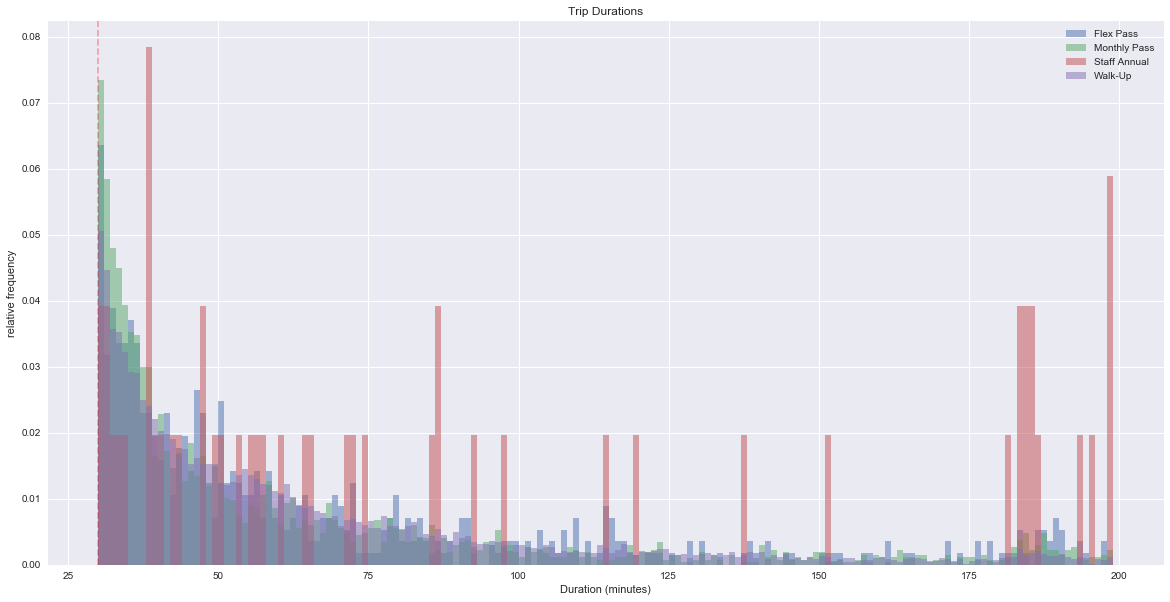

In [56]:
trips['minutes'] = trips.Duration / 60
trips.groupby('PassholderType')['minutes'].hist(bins=np.arange(30,200), alpha=0.5, normed=True, figsize=(20,10));
plt.xlabel('Duration (minutes)')
plt.ylabel('relative frequency')
plt.title('Trip Durations')
#plt.text(32, 0.09, "Free Trips\n\nAdditional Fee", ha='right',size=18, rotation=90, alpha=0.5, color='red')
plt.legend(['Flex Pass', 'Monthly Pass', 'Staff Annual','Walk-Up'])

plt.axvline(30, linestyle='--', color='red', alpha=0.3);



In [ ]:
plt.axvline(40, linestyle='--', color='red', alpha=0.3);
plt.text(34, 0.09, "Free Trips\n\nAdditional Fee", ha='right',size=18, rotation=90, alpha=0.5, color='red')

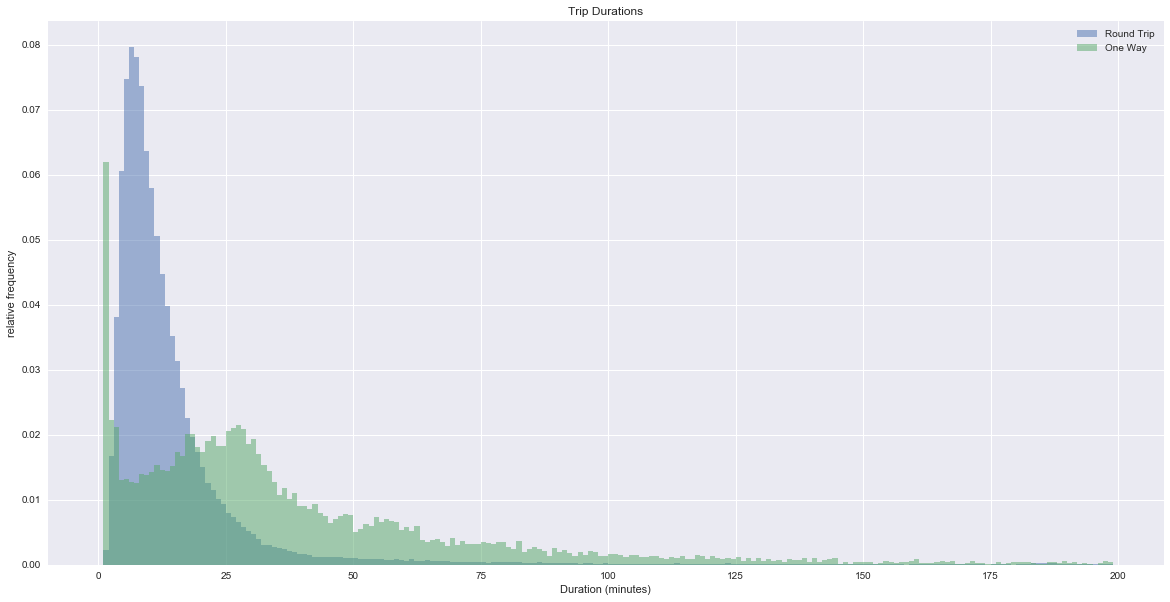

In [40]:
trips['minutes'] = trips.Duration / 60
trips.groupby('TripRouteCategory')['minutes'].hist(bins=np.arange(200), alpha=0.5, normed=True, figsize=(20,10));
plt.xlabel('Duration (minutes)')
plt.ylabel('relative frequency')
plt.title('Trip Durations')
plt.legend(['Round Trip', 'One Way'])



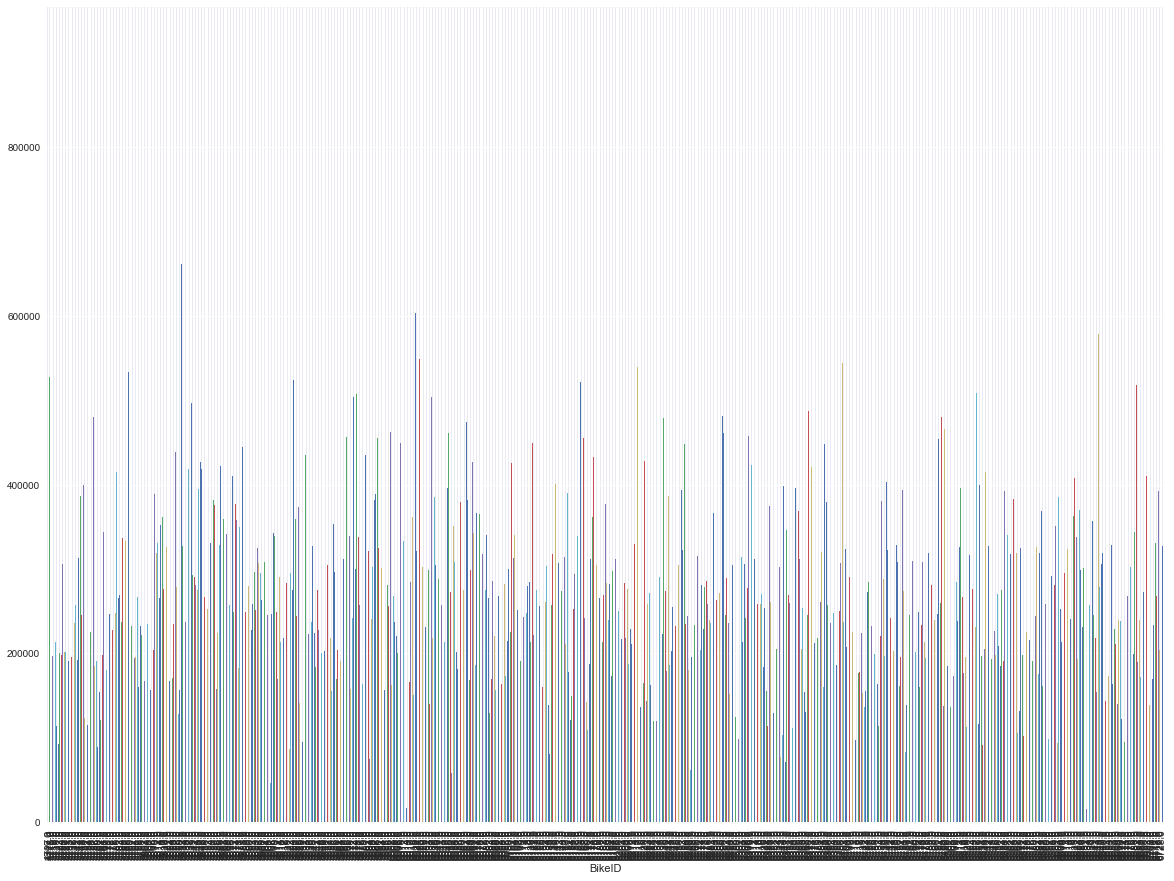

In [68]:
trips.groupby('BikeID').sum()['Duration'].plot.bar(figsize=(20,15))

In [69]:
trips.groupby('BikeID').mean()['Duration']

BikeID
1349.0    18660.000000
4727.0     1688.846154
4728.0     1068.227848
5715.0     1183.734940
5716.0      986.586826
5718.0     1614.090909
5719.0     2141.886792
5721.0     1028.000000
5722.0      956.842105
5723.0     1794.545455
5724.0     1567.384615
5725.0     1158.965517
5726.0     1278.227848
5727.0     1174.285714
5731.0     1464.461538
5733.0     1983.396226
5735.0     1275.686275
5737.0     1811.523179
5738.0     1331.525424
5739.0     1124.803493
5741.0     1084.406780
5743.0     2349.924812
5744.0     2590.469799
5745.0     1545.283019
5748.0     2379.285714
5750.0     1087.433628
5751.0     1917.391304
5752.0     1305.000000
5753.0     2366.853147
5754.0     1060.188679
              ...     
6669.0     1228.762887
6670.0     1016.500000
6671.0     2033.932584
6672.0      926.470588
6674.0     1024.670659
6675.0     1213.574661
6676.0     1230.833333
6677.0     1249.586777
6678.0     2074.400000
6679.0     1383.750000
6680.0     2187.898089
6681.0     3623.076923
6682